In [ ]:
# Import the data set
system("wget https://raw.githubusercontent.com/ericleaf/113-2-R-final-project/227dcdef724f6b886cb5418cd0eced63df9d9508/vote_income.csv")

In [ ]:
library(tidyverse)

# Parse the variable
vote_income <- read.csv("vote_income.csv")
vote_income <- vote_income %>%
  mutate(
    county = as.character(county),
    town   = as.character(town),
    vill   = as.character(vill),
    dpp    = as.numeric(dpp),
    kmt    = as.numeric(kmt),
    tpp    = as.numeric(tpp),
    npp    = as.numeric(npp),
    median = as.integer(median),
    sd     = as.numeric(sd)
  )

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
library(tidyverse)
library(jsonlite)

# Create a named list of variable descriptions
var_descriptions <- list(
  county = "The county (直轄市、縣或市) where the village is located.",
  town   = "The town (鄉、鎮、市或區) where the village is located.",
  vill   = "The village (村或里) name.",
  dpp    = "Vote share of the Democratic Progressive Party (DPP) in the 2024 election.",
  kmt    = "Vote share of the Kuomintang (KMT) in the 2024 election.",
  tpp    = "Vote share of the Taiwan People's Party (TPP) in the 2024 election.",
  npp    = "Vote share of the New Power Party (NPP) in the 2024 election.",
  median = "Median income in the village in 2021.",
  sd     = "Standard deviation of income in the village in 2021."
)

# Function to summarize each variable
summarize_variable <- function(var, var_name) {
  var_class <- class(var)[1]

  summary <- list(
    class = var_class,
    description = var_descriptions[[var_name]]
  )

  if (var_class %in% c("character", "factor")) {
    summary$sample_values <- head(unique(var), 5)
    summary$n_unique <- length(unique(var))
    summary$n_missing <- sum(is.na(var))
  } else if (var_class %in% c("numeric", "integer")) {
    summary$mean <- mean(var, na.rm = TRUE)
    summary$sd <- sd(var, na.rm = TRUE)
    summary$min <- min(var, na.rm = TRUE)
    summary$max <- max(var, na.rm = TRUE)
    summary$n_missing <- sum(is.na(var))
  }

  return(summary)
}

# Apply the summarizing function to each column
summary_list <- imap(vote_income, summarize_variable)

# Create final JSON object
final_output <- list(
  description = "Summary of each variable in the 'vote_income' data frame based on its class and contents.",
  summary = summary_list
)

# Save to JSON file
write_json(final_output, "vote_income.json", pretty = TRUE, auto_unbox = TRUE)



Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten




In [ ]:
library(tidyverse)

# Create models
model_dpp <- lm(dpp ~ median + sd, data = vote_income)
model_kmt <- lm(kmt ~ median + sd, data = vote_income)
model_tpp <- lm(tpp ~ median + sd, data = vote_income)
model_npp <- lm(npp ~ median + sd, data = vote_income)

# Custom function to display results
display_model <- function(model) {
  summary_df <- summary(model)$coefficients %>%
    as_tibble(rownames = "term") %>%
    rename(
      estimate = Estimate,
      std_error = `Std. Error`,
      statistic = `t value`,
      p_value = `Pr(>|t|)`
    ) %>%
    mutate(
      estimate = sprintf("%.8f", estimate),
      std_error = sprintf("%.8f", std_error),
      statistic = sprintf("%.4f", statistic),
      p_value = sprintf("%.4f", p_value)
    )
  print(summary_df, n = Inf)
}

# Turn off scientific notation
options(scipen = 999)

# Display each model
cat("Model for DPP:\n")
display_model(model_dpp)

cat("\nModel for KMT:\n")
display_model(model_kmt)

cat("\nModel for TPP:\n")
display_model(model_tpp)

cat("\nModel for NPP:\n")
display_model(model_npp)

Model for DPP:
# A tibble: 3 × 5
  term        estimate    std_error  statistic p_value
  <chr>       <chr>       <chr>      <chr>     <chr>  
1 (Intercept) 0.47201364  0.00523643 90.1404   0.0000 
2 median      -0.00022266 0.00001282 -17.3677  0.0000 
3 sd          0.00000184  0.00000176 1.0463    0.2954 

Model for KMT:
# A tibble: 3 × 5
  term        estimate    std_error  statistic p_value
  <chr>       <chr>       <chr>      <chr>     <chr>  
1 (Intercept) 0.33952132  0.00510551 66.5009   0.0000 
2 median      0.00003360  0.00001250 2.6881    0.0072 
3 sd          -0.00000106 0.00000171 -0.6204   0.5350 

Model for TPP:
# A tibble: 3 × 5
  term        estimate    std_error  statistic p_value
  <chr>       <chr>       <chr>      <chr>     <chr>  
1 (Intercept) 0.12984942  0.00211300 61.4527   0.0000 
2 median      0.00016323  0.00000517 31.5530   0.0000 
3 sd          -0.00000086 0.00000071 -1.2191   0.2228 

Model for NPP:
# A tibble: 3 × 5
  term        estimate   std_error  stat

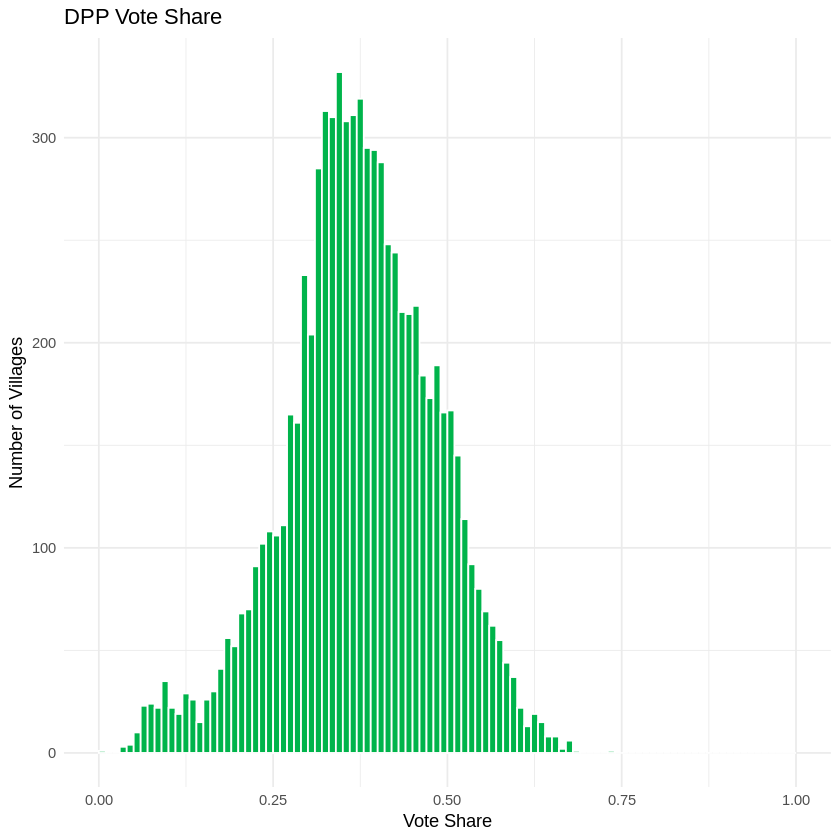

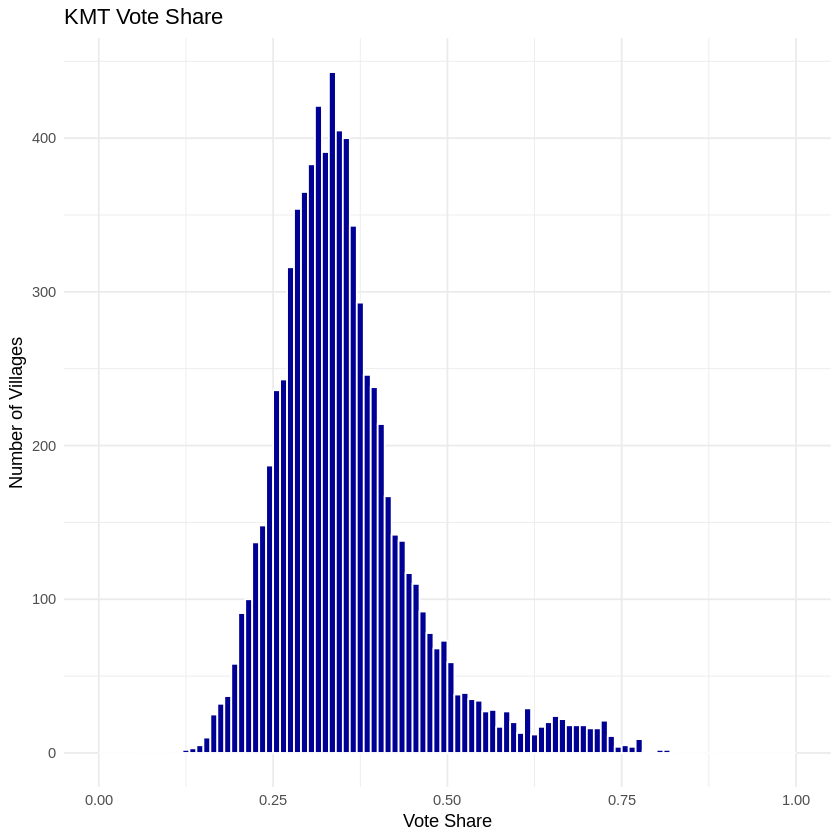

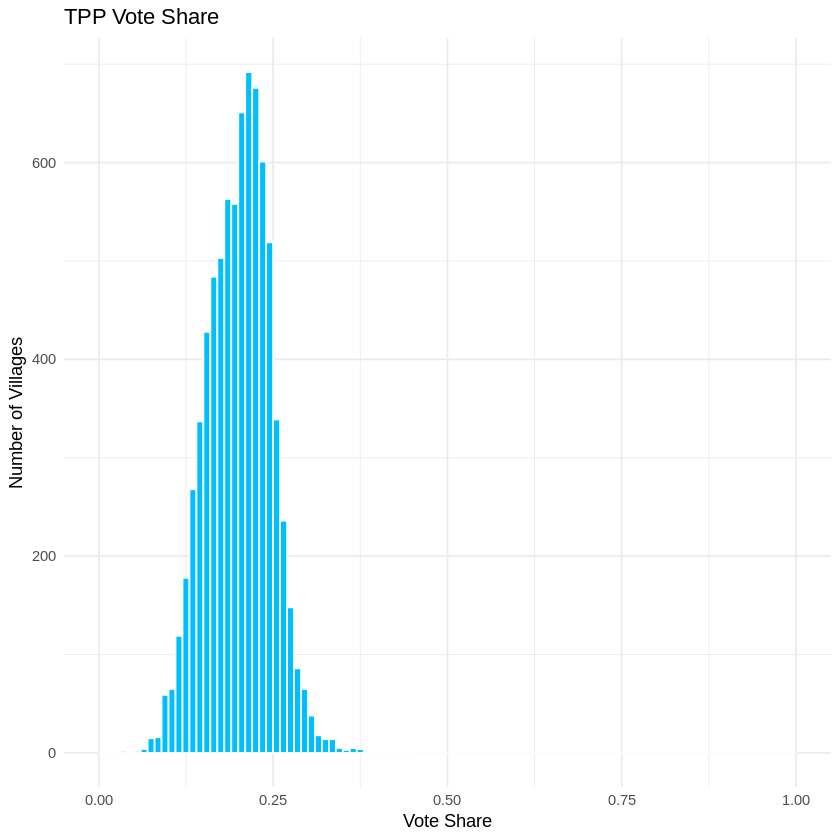

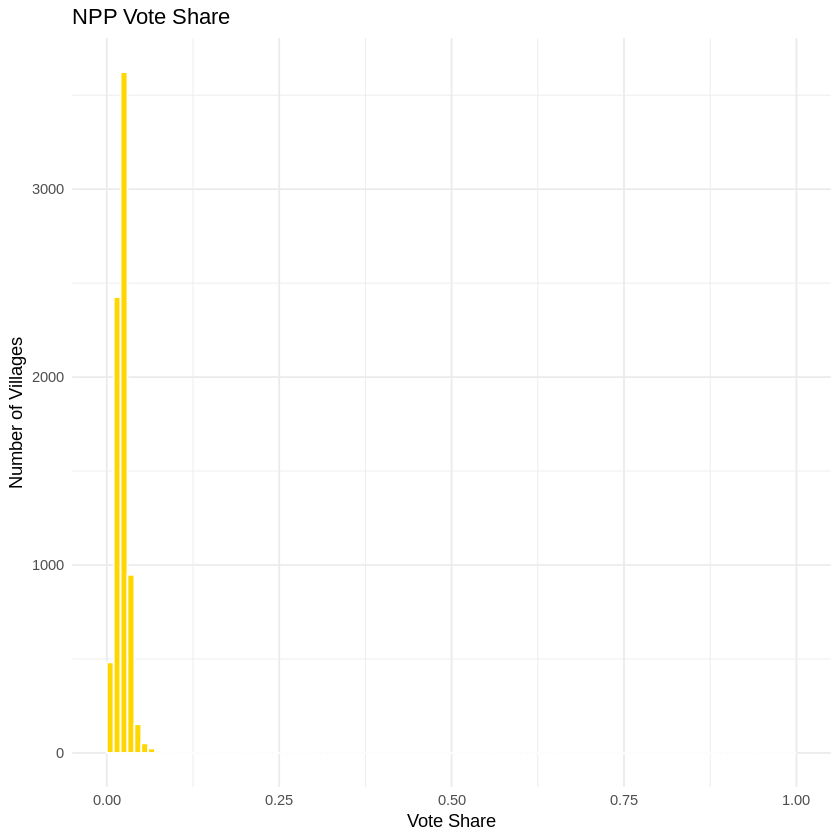

In [ ]:
library(tidyverse)

# Histogram for DPP (green)
ggplot(vote_income, aes(x = dpp)) +
  geom_histogram(binwidth = 0.01, fill = "#00B44B", color = "white", boundary = 0) +
  scale_x_continuous(limits = c(0, 1)) +
  labs(title = "DPP Vote Share", x = "Vote Share", y = "Number of Villages") +
  theme_minimal()

# Histogram for KMT (blue)
ggplot(vote_income, aes(x = kmt)) +
  geom_histogram(binwidth = 0.01, fill = "#000095", color = "white", boundary = 0) +
  scale_x_continuous(limits = c(0, 1)) +
  labs(title = "KMT Vote Share", x = "Vote Share", y = "Number of Villages") +
  theme_minimal()

# Histogram for TPP (cyan/light blue)
ggplot(vote_income, aes(x = tpp)) +
  geom_histogram(binwidth = 0.01, fill = "#00BFFF", color = "white", boundary = 0) +
  scale_x_continuous(limits = c(0, 1)) +
  labs(title = "TPP Vote Share", x = "Vote Share", y = "Number of Villages") +
  theme_minimal()

# Histogram for NPP (yellow)
ggplot(vote_income, aes(x = npp)) +
  geom_histogram(binwidth = 0.01, fill = "#FFD700", color = "white", boundary = 0) +
  scale_x_continuous(limits = c(0, 1)) +
  labs(title = "NPP Vote Share", x = "Vote Share", y = "Number of Villages") +
  theme_minimal()